In [1]:
from PIL import Image
import torchvision.transforms as transforms

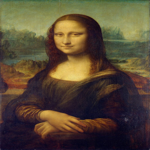

In [6]:
import matplotlib.pyplot as plt

def visualize(image, random_transformer, name):
    fig, axes = plt.subplots(3, 3, figsize=(6, 6))
    
    axes = axes.flatten()
    
    axes[0].imshow(image)
    axes[0].axis("off")
    
    for i in range(1, 9):
        axes[i].imshow(random_transformer(image))
        axes[i].axis("off")

    fig.suptitle(name.capitalize())
    fig.tight_layout()
    plt.savefig(f"augment/{name}.png")
    plt.show()

image = Image.open("image1.jpg")
image = image.resize((150, 150))
image

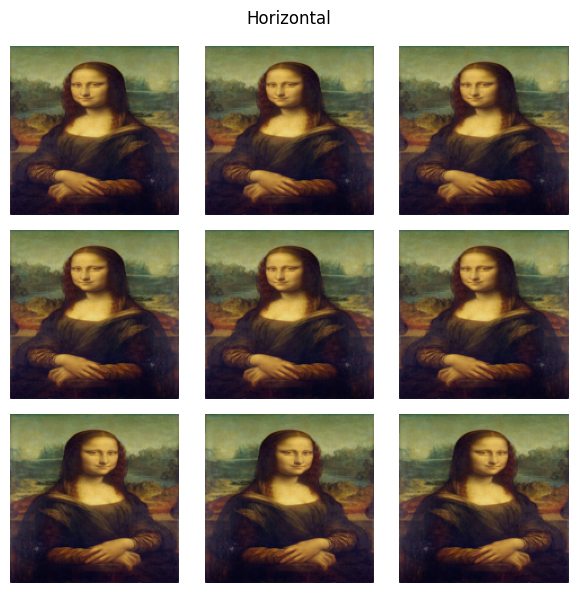

In [7]:
visualize(image, transforms.RandomHorizontalFlip(), "horizontal")

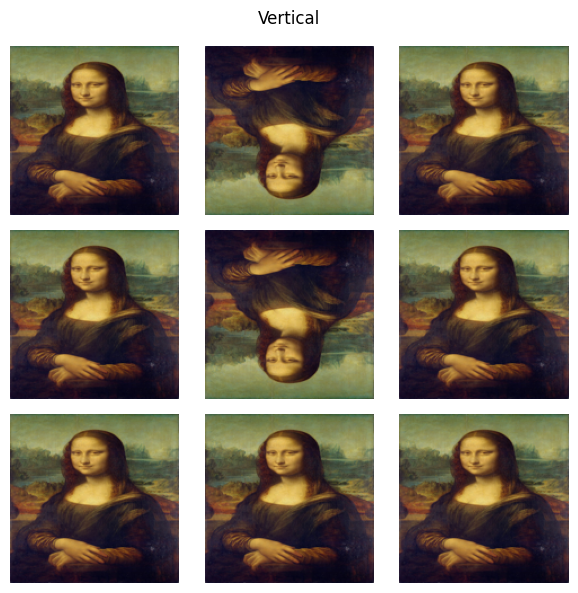

In [8]:
visualize(image, transforms.RandomVerticalFlip(), "vertical")

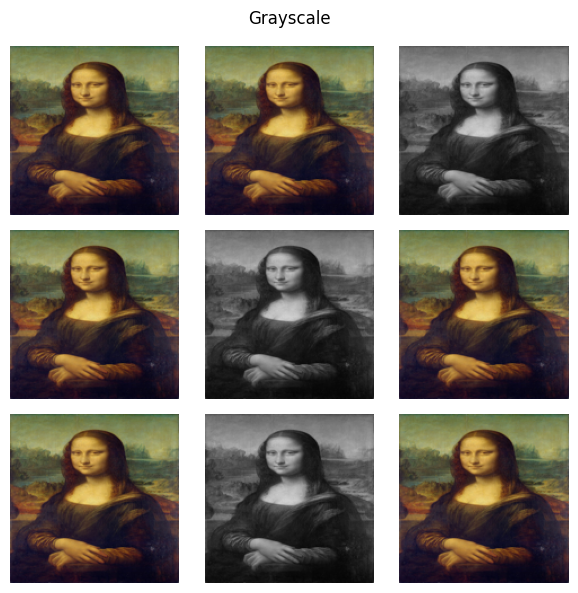

In [9]:
visualize(image, transforms.RandomGrayscale(p=0.5), "grayscale")

## Perspective
- 정의: 이미지의 원금감을 임의로 변형하여, 마치 다른 각도에서 찍은 것처럼 만드는 함수
- 동작원리:
  - 이미지의 4개 모서리 좌표를 기준으로 목표 모서리 좌표를 무작위로 조정
  - 원본 이미지 좌표와 목표 간 원근 변환 계산
  - 계산된 변환 행렬을 이용해 이미지를 변환
  - 결과적으로 이미지가 기울어지고 왜곡된 듯한 형태가 됨

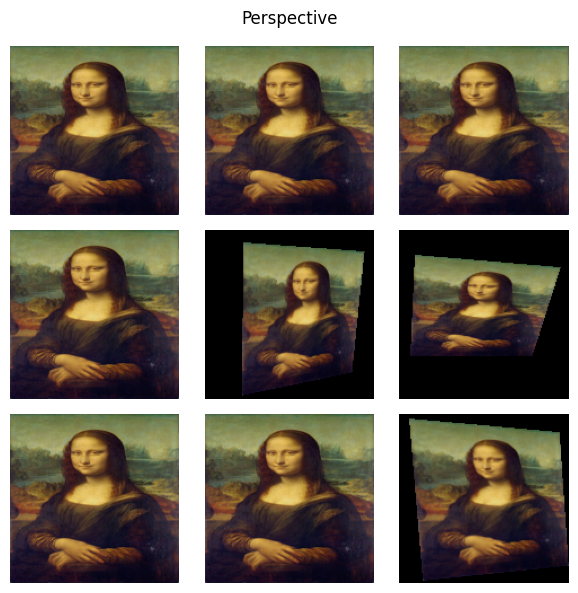

In [10]:
visualize(image, transforms.RandomPerspective(), "perspective")

## ResizedCrop
- 정의: 이미지에서 임의의 영역을 잘라내고 원하는 크기로 리사이즈하는 변환
- 동작원리
  - 이미지에서 임의의 위치와 크기로 사각형 영역 선택
  - 선택한 영역을 원하는 크기로 리사이즈
  - 결과적으로 **이미지 일부만 학습에 사용**되면서 모델이 위치, 크기 변화에 robust

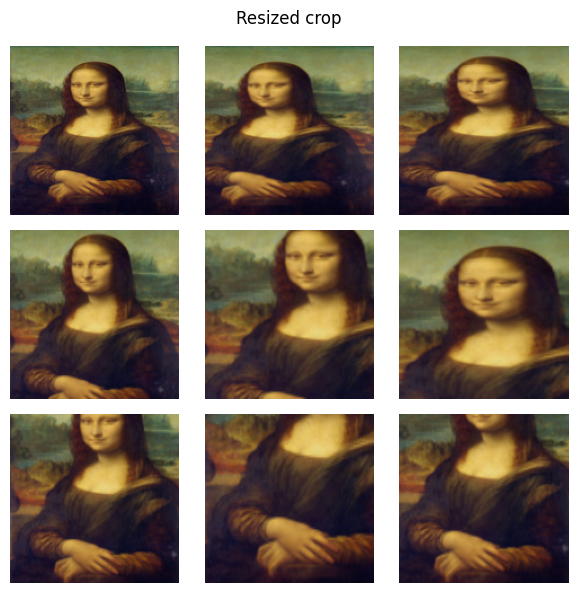

In [11]:
visualize(image, transforms.RandomResizedCrop(size=image.size), "resized crop")

## ColorJitter
- 정의: 이미지의 **색상 속성**을 임의로 바꾸어 학습 데이터를 다양화하는 증강 기법
  - 색상 속성: 밝기(brightness), 대비(contrast), 채도(saturation), 색조(hue)
- 동작 원리
  - 입력 이미지의 픽셀 값을 가져옴
  - 지정된 파라미터 범위 내에서 각 속성을 랜덤하게 변경
    - 예: 밝기 ±10%, 대비 ±10% 등
  - 변경된 픽셀 값을 다시 이미지로 변환
  - 결과적으로 원본 이미지와 **같은 장면을 담지만 색감이 달라진 이미지** 생성

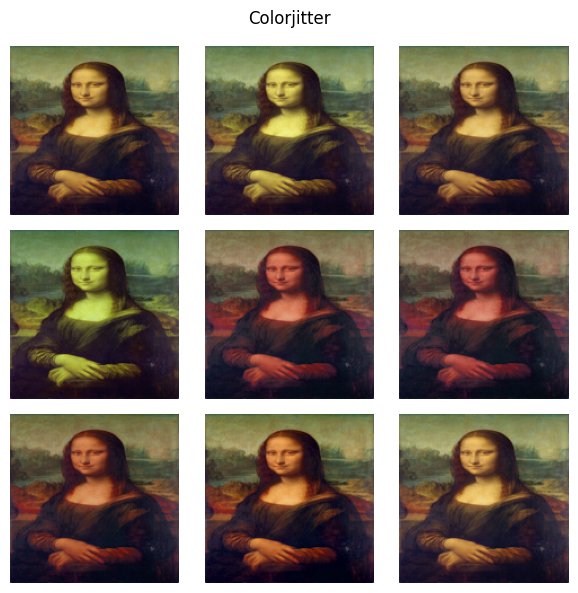

In [12]:
visualize(image, transforms.ColorJitter(
    brightness=0.1,
    contrast=0.1,
    saturation=0.1,
    hue=0.1
), "colorjitter")

## RandomRotation
- 정의: 이미지를 임의의 각도로 회전시켜 다양성을 늘리는 증강 기법
- 동작원리
  - 입력 이미지의 중심점을 기준으로 회전 각도를 래덤하게 선택
    - 예: degrees=(-30, 20) → -30° ~ +20° 사이에서 무작위 선택
  - 이미지의 모든 픽셀 좌표를 선택한 회전 행렬로 변환
  - 회전 후 생기는 빈 영역은 기본적으로 **0 또는 지정한 색으로 채움**
  - 결과적으로 원본 이미지는 그대로지만, 시각적으로 회전된 이미지 생성

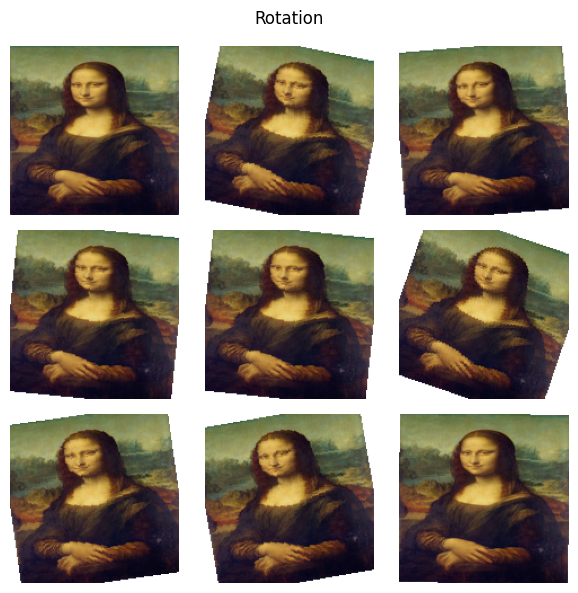

In [13]:
visualize(image, transforms.RandomRotation(degrees=(-30, 10), fill=255), "rotation")

## RandomAffine
- 정의: 이미지에 회전, 이동, 확대/축소, 전단(shear) 변환을 결합해 임의 변형하는 증각 기법
  - RandomRotation, RandomTranslation, RandomScale, RandomShear
  - Shear: 이미지 한쪽 축 방향으로 기울이기
- 동작 원리
  - 회전, 이동, 확대/축소, 전단
  - 결합: 위 변환들을 합성해서 하나의 Affine변환 행렬 생성
  - 빈 영역 처리

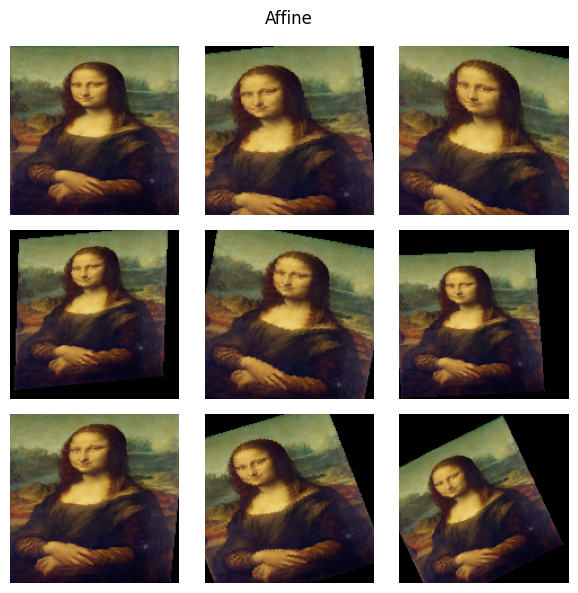

In [14]:
visualize(image, transforms.RandomAffine(
    degrees=30, # 회전 ±30도
    translate=(0.1, 0.1), # x, y 방향으로 최대 10% 이동
    scale=(0.8, 1.2), # 80%~120% 크기 변경
    shear=10 # 최대 10도 전단
), "affine")

# RandomErasing
- 정의: 이미지의 일부 영역을 임의로 지워서 데이터 다양성을 늘리는 증강 기법
  - 모델이 부분적으로 가려진 객체에도 강건하게 학습
- 동작원리
  - 랜덤하게 사각형 영역 위치와 크기 선택
    - 영역 크기 비율: 전체 이미지 대비 scale 범위
    - 종횡비: ratio 범위 내 랜덤
  - 선택한 영역의 픽셀 값을 0(검정), 평균값, 랜덤 값 등으로 채움
  - 나머지 이미지 픽셀은 그대로 유지

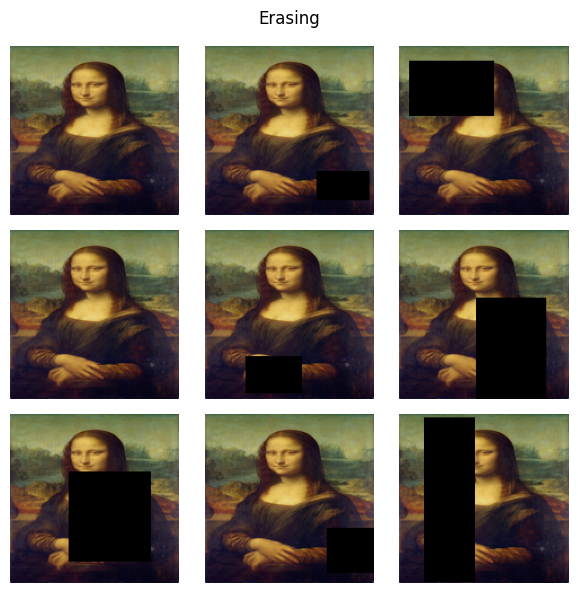

In [15]:
random_erasing = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomErasing(),
    transforms.ToPILImage()
])
visualize(image, random_erasing, "erasing")

## GaussianBlur
- 정의: 이미지에 가우시안 블러(흐림 효과)를 적용하는 증강 기법
    - 모델이 세부 노이즈나 작은 디테일에 덜 민감하게 학습하도록 도움
    - 노이즈 제거, 일반화 성능 향상, 이미지 데이터 다양화 목적
- 동작 원리
  - 가우시안 커널(Gaussian Kernel) 생성
    - 커널 크기와 표준편차 설정
  - 입력 이미지의 각 픽셀에 주변 픽셀 값을 가우시안 가중치로 평균
    - 주변 픽셀일수록 더 많은 영향
  - 결과적으로 이미지가 부드럽게 흐려진 느낌 생성

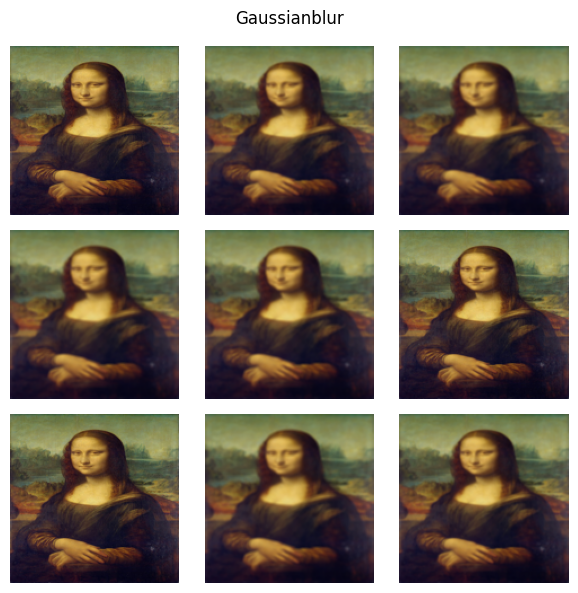

In [16]:
visualize(image, transforms.GaussianBlur(kernel_size=3), "gaussianblur")

## RandomInvert
- 정의: 이미지의 색상을 반전
  - 밝은 부부은 어둡게, 어두운 부분은 밝게 변환
  - 모델이 색상 대비 변화에 강건하게 학습하도록 도움
- 동작 원리
  - 변환 확률 p
    - 각 픽셀 값 v
    - 255 - v (RGB 0~255기준)
  - 변환하지 않으면 원본 이미지 그대로 출력

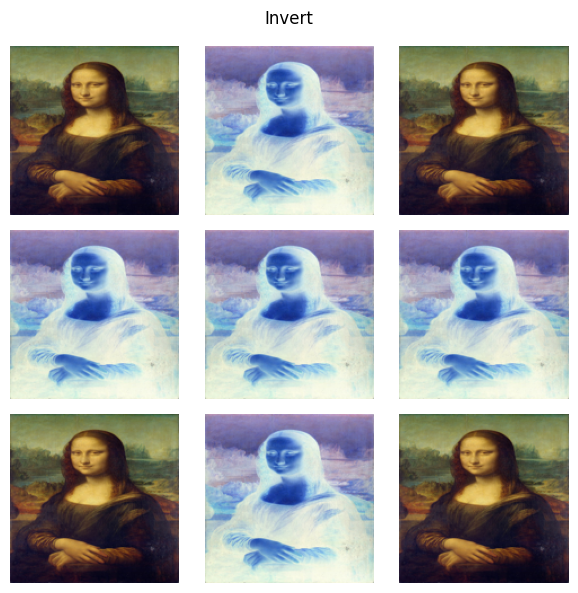

In [17]:
visualize(image, transforms.RandomInvert(), "invert")

## RandomPosterize
- 정의: 이미지의 색상 비트를 줄여 계조(톤)를 단순화하는 방법
  - 색상 표현을 단순화하여 색상 변화와 잡음에 강건한 모델 학습에 도움
  - 특히 생상 대비보다 형태/구조 중심 학습을 유도
- 동작 원리
  - 각 채널의 비트 수(bit depth)를 줄임
  - 색상 표현 가능한 값이 줄어들어, 계조가 단순화
- bits: 남겨둘 색상 비트 수(1~8)

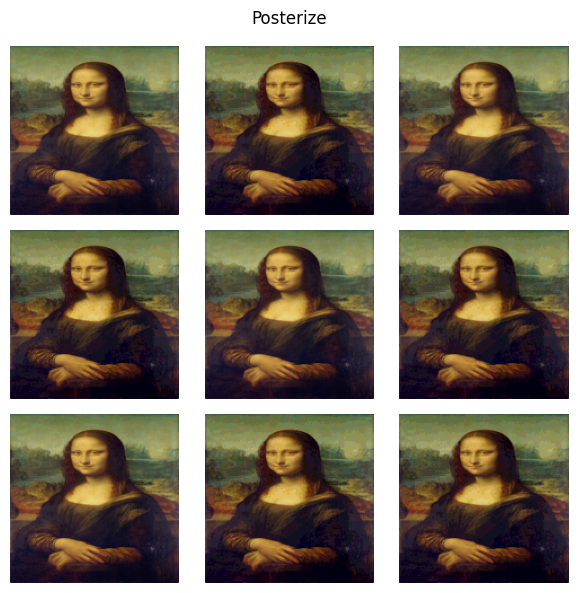

In [18]:
visualize(image, transforms.RandomPosterize(bits=4), "posterize")

## RandomSolarize
- 정의: 이미지의 픽셀 값을 임계깞(threshold) 이상이면 반전(invert)시키는 방법
  - 픽셀 밝기가 일정 값 이상이면 색상을 반전
  - 모델이 밝기 변화나 하이라이트에도 강건하도록 학습
- 동작 원리
  - 픽셀 v
  - v > threshold: v = 255 - v

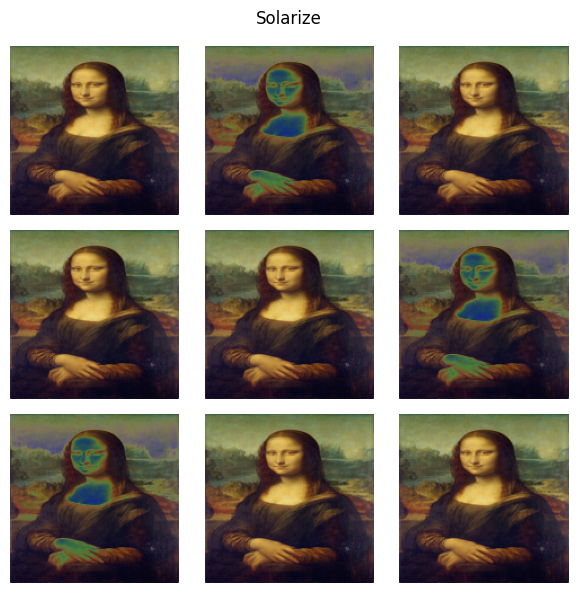

In [19]:
visualize(image, transforms.RandomSolarize(threshold=255 // 2), "solarize")

## RandomAdjustSharpness
- 정의: 이미지의 선명도를 임의로 조정하는 증강 기법
  - 모델이 선명도 변화에 덜 민감하게 학습하도록 도움
  - 흐릿하거나 선명한 이미지에도 강건하게 학습
- 동작원리
  - sharpness_factor
    - 0: 완전히 흐림
    - 1: 원본 이미지 유지
    - $\text{> 1}$: 원본 보다 선명
  - 픽셀 값을 주변값과 가중 평균하여 선명도 조정

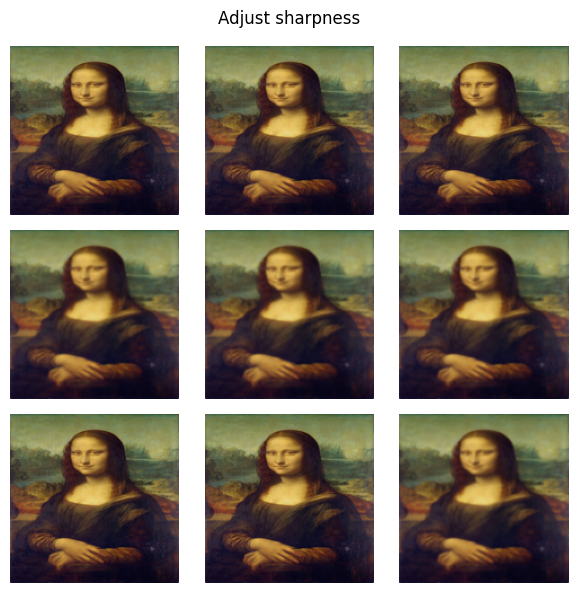

In [20]:
visualize(image, transforms.RandomAdjustSharpness(sharpness_factor=0), "adjust sharpness")

## RandomAutoContrast
- 정의: 이미지의 밝기와 대비를 자동으로 조정하는 방법
  - 이미지의 최솟값과 최댓값을 이용해 전체 픽셀 값을 스케일링
  - 모델이 밝기/대비 변화에도 강건하게 학습하도록 도움
- 동작원리
  - 이미지 내 각 채널의 최소값(min)과 최대값(max) 계산
  - 최소값 → 0, 최대값 → 255로 픽셀 값을 선형 스케일링
  - 전체 대비가 자동으로 최적화

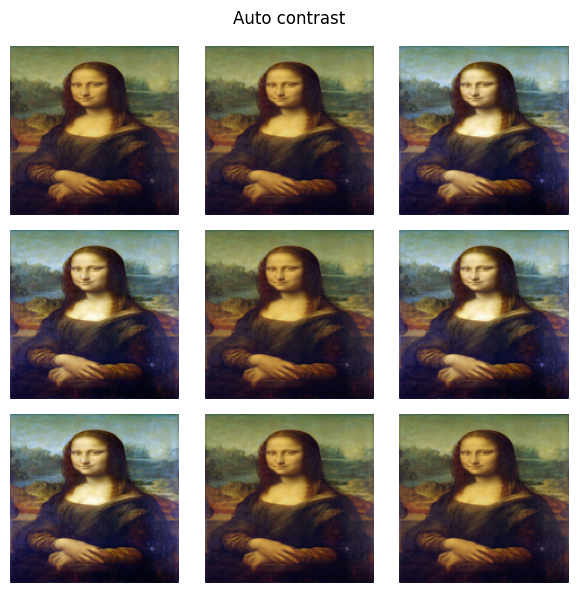

In [21]:
visualize(image, transforms.RandomAutocontrast(), "auto contrast")

## RandomEqualize
- 정의: 이미지의 히스토그램을 균등화하여 밝기 분포를 평평하게 만드는 증각 기법
  - 이미지 밝기나 대비 편차가 큰 경우 모델이 다양한 조명 환경에서도 강건하게 학습
- 동작 원리
  - 이미지의 히스토그램 계산
    - 각 픽셀 값이 몇 번 나타났는지 확인
  - 누적 분포(CDF)를 이용해 픽셀 값을 재분포
  - 결과적으로 밝기가 전체 범위에 골고루 분포

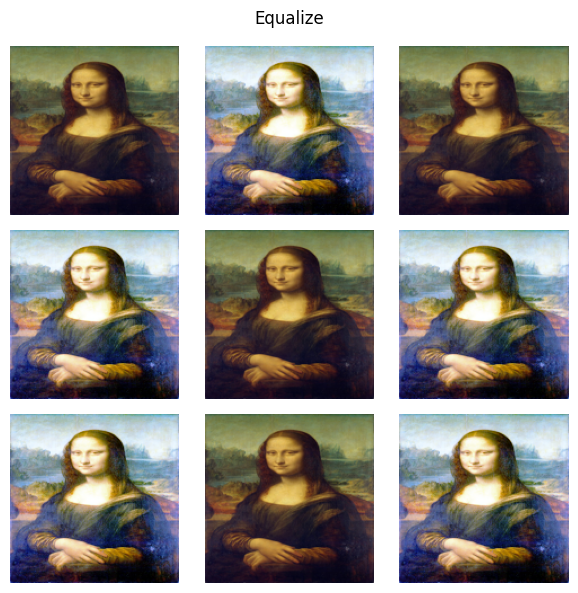

In [22]:
visualize(image, transforms.RandomEqualize(), "equalize")

## Mixup
- 정의: 두 이미지를 가중 평균하여 합성하고, 라벨도 동일 비율로 섞는 기법
- 결과
  - 이미지 혼합으로 모델이 경계에 덜 민감하게 학습
  - 일반화 성능 향상, 오버피팅 ㅏㄱㅁ소
- 동작 원리
  - 두 이미지 `x1`, `x2`와 라벨 `y1`, `y2` 선택
  - $\lambda$를 베타 분포에서 샘플링
  - $x_{new} = \lambda  x_1 + (1-\lambda) x_2$
  - $y_{new} = \lambda  y_1 + (1-\lambda) y_2$

In [47]:
image2 = Image.open("image2.jpeg")
image2 = image2.resize((150, 150))
    
img1 = np.array(image).astype(np.float32)
img2 = np.array(image2).astype(np.float32)

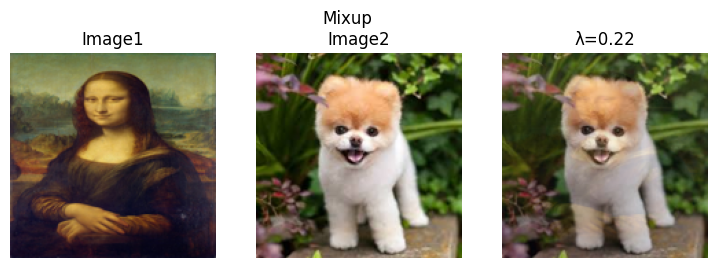

In [57]:
import numpy as np
from random import betavariate
def mixup(img1, img2, alpha=0.4):
    lam = betavariate(alpha, alpha)
    
    img_mix = lam * img1 + (1-lam) * img2
    img_mix = np.clip(img_mix, 0 , 255).astype(np.uint8)
    return img_mix, lam


img_mix, lam = mixup(img1, img2)

fig, axes = plt.subplots(1,3, figsize=(9,3))

axes[0].imshow(img1.astype(np.uint8))
axes[0].set_title("Image1")
axes[0].axis("off")

axes[1].imshow(img2.astype(np.uint8))
axes[1].set_title("Image2")
axes[1].axis("off")

axes[2].imshow(img_mix)
axes[2].set_title(f"λ={lam:.2f}")
axes[2].axis("off")

fig.suptitle("Mixup")
plt.savefig("augment/Mixup.png")
plt.show()

## CutMix
- 정의: Mixup과 유사하지만, 한 이미지 일부 영역을 다른 이미지로 교체 + 라벨 혼합
- 결과
  - occlusion대비 학습 강화
  - Mixup보다 더 현실적인 이미지 혼합(일반화 성능 향상)
- 동작 원리
  - 두 이미지 `x1`, `x2`와 라벨 `y1`, `y2` 선택
  - `x2`의 랜덤 패치를 `x1`에 덮어쓰기
  - $\lambda=$ 패치 비율
  - $y_{new} = \lambda  y_1 + (1-\lambda) y_2$

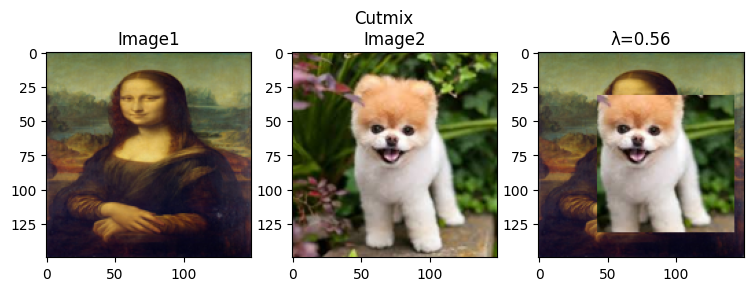

In [58]:
from random import randint
def cutmix(img1, img2, alpha=0.4):
    lam = betavariate(alpha, alpha)
    
    H, W, _ = img1.shape
    cut_rat = np.sqrt(1 - lam)
    cut_w = int(W * cut_rat)
    cut_h = int(H * cut_rat)
    
    cx = randint(0, W)
    cy = randint(0, H)
    
    x1 = np.clip(cx - cut_w // 2, 0, W)
    y1 = np.clip(cy - cut_h // 2, 0, H)
    x2 = np.clip(cx + cut_w // 2, 0, W)
    y2 = np.clip(cy + cut_h // 2, 0, H)
    
    img_cut = img1.copy()
    img_cut[y1:y2, x1:x2, :] = img2[y1:y2, x1:x2, :]
    return img_cut, lam
    
img_cut, lam = cutmix(img1, img2)

# 시각화
fig, axes = plt.subplots(1,3, figsize=(9,3))
axes[0].imshow(img1.astype(np.uint8))
axes[0].set_title("Image1")

axes[1].imshow(img2.astype(np.uint8))
axes[1].set_title("Image2")

axes[2].imshow(img_cut.astype(np.uint8))
axes[2].set_title(f"λ={lam:.2f}")

fig.suptitle("Cutmix")
plt.savefig("augment/Cutmix.png")
plt.show()